In [1]:
from google.colab import drive
drive.mount('/content/drive')

import torch
import torchvision
import torchvision.transforms as tr
from torch.utils.data import DataLoader, Dataset
import numpy as np
import matplotlib.pyplot as plt

Mounted at /content/drive


In [2]:
transf=tr.Compose([tr.Resize(16),tr.ToTensor()]) #원하는 전처리 넣기, 16X16이미지 크기 변환
trainset=torchvision.datasets.CIFAR10(root='./data',train=True,download=True,transform=transf) #클래스가 10개인 이미지 세트, root=다운받을 경로,
testset=torchvision.datasets.CIFAR10(root='./data',train=False, download=True, transform=transf) #미리 선언한 전처리 사용하기
print(trainset[0][0].size())

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
torch.Size([3, 16, 16])


In [4]:
trainloader=DataLoader(trainset,batch_size=50,shuffle=True) #DataLoader:데이터를 미니배치형태로
testlodaer=DataLoader(testset,batch_size=50,shuffle=False) #무작위 데이터 섞지않고 한번에 50개이미지 묶은 배치 제공
len(trainloader) #CIFAR10의 학습 이미지는 50000장, 배치사이즈 50장이므로 1000은 배치의 개수

1000

In [5]:
images,labels=iter(trainloader).next()
print(images.size()) #iter,next 함수 이용해서 trainloader의 첫번째 배치 불러오기

torch.Size([50, 3, 16, 16])


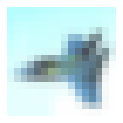

In [6]:
oneshot=images[1].permute(1,2,0).numpy() #permute(1,2,0)은 기존 차원의 위치 0,1,2를 1,2,0로 바꿔줌(3,16,16)->(16,16,3)
plt.figure(figsize=(2,2))
plt.imshow(oneshot)
plt.axis("off")
plt.show()